<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/PCD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


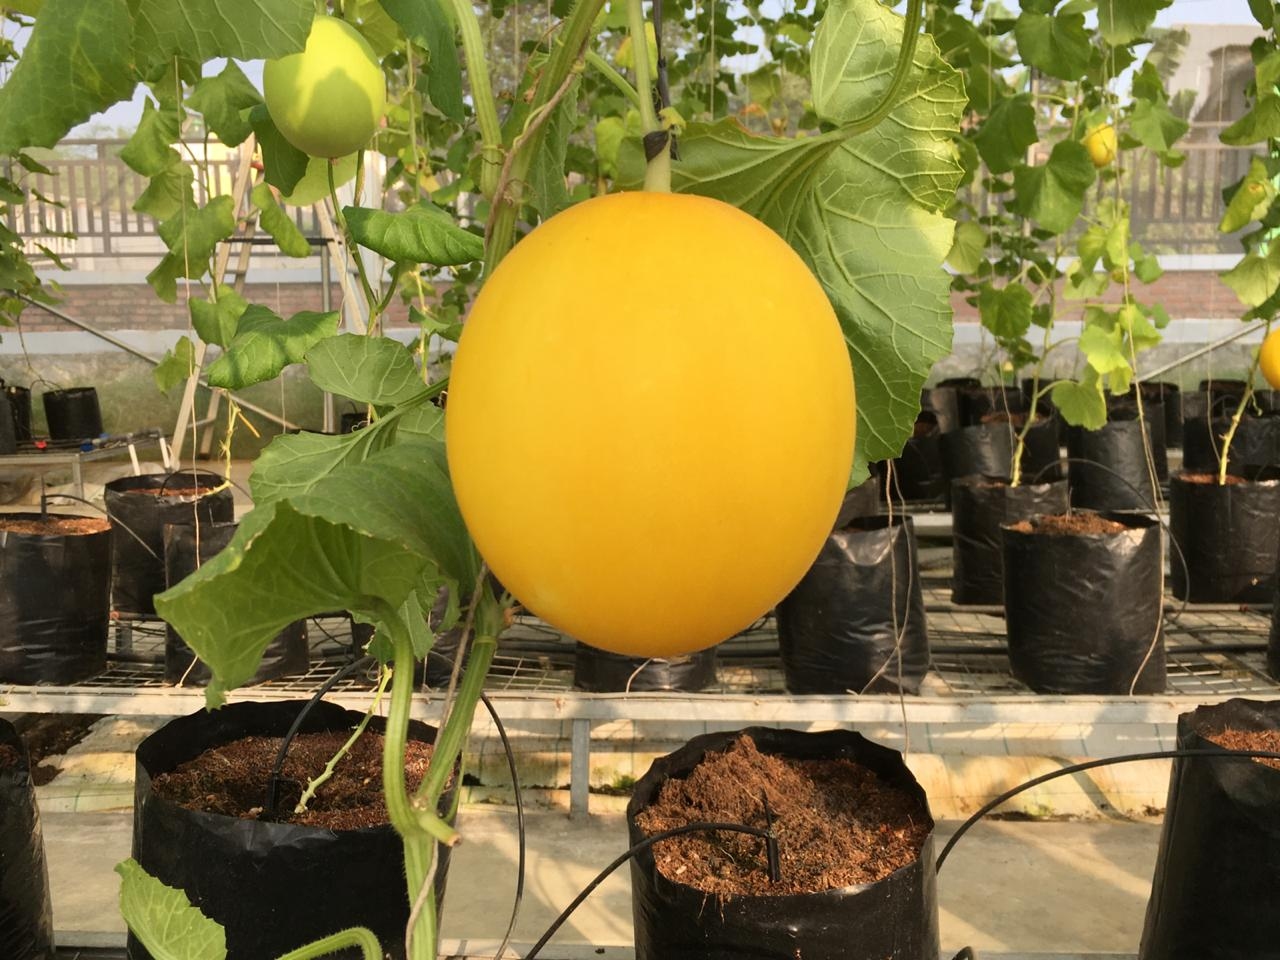

In [4]:
#baca gambar 
gambar = cv2.imread("/content/drive/MyDrive/PCD/5/melon.jpeg")
cv2_imshow(gambar)

In [35]:
#HSV
row, col, ch = gambar.shape
kanvas_hsv = np.zeros((row, col, 3), np.uint8)

for i in range (0, row):
  for j in range (0, col):
    b = gambar[i,j,0]/255
    g = gambar[i,j,1]/255
    r = gambar[i,j,2]/255

    vmax = max(r, g, b)
    vmin = min(r, g, b)
    v = vmax
    # h
    if (v == r):
      h = 60*(g-b) / (v-vmin)
    if (v == g):
      h = 120 + 60*(b-r) / (v-vmin)
    if (v == b):
      h = 240 + 60*(r-g) / (v-vmin)
    if (v == r == g == b):
      h = 0
    # s
    if (v != 0):
      s = (v - vmin) / v
    else:
      s = 0 
    # v
    v = vmax

    kanvas_hsv[i,j,0] = h/2
    kanvas_hsv[i,j,1] = s*255
    kanvas_hsv[i,j,2] = v*255

<ipython-input-35-026274fc346f>:16: RuntimeWarning: invalid value encountered in double_scalars
  h = 60*(g-b) / (v-vmin)
<ipython-input-35-026274fc346f>:18: RuntimeWarning: invalid value encountered in double_scalars
  h = 120 + 60*(b-r) / (v-vmin)
<ipython-input-35-026274fc346f>:20: RuntimeWarning: invalid value encountered in double_scalars
  h = 240 + 60*(r-g) / (v-vmin)


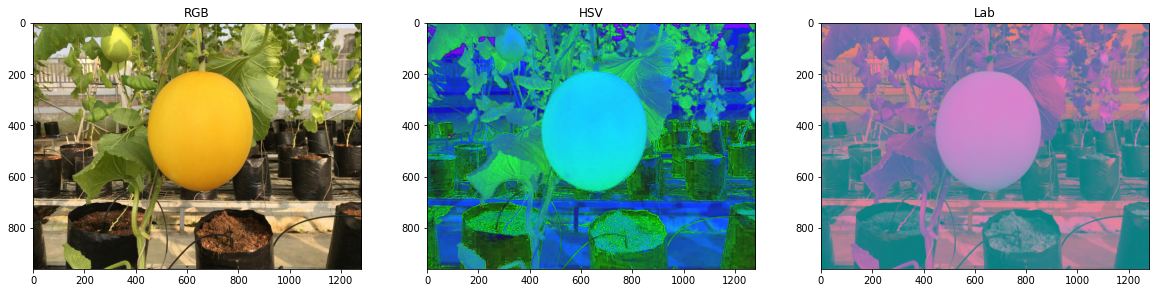

In [36]:
# BGR to Lab color
gambarLab = cv2.cvtColor(gambar, cv2.COLOR_BGR2LAB)


# BGR to RGB
gambarRGB = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('RGB')
ax[0,0].imshow(gambarRGB, vmin=0, vmax=255)

ax[0,1].set_title('HSV')
ax[0,1].imshow(kanvas_hsv, vmin=0, vmax=255)

ax[0,2].set_title('Lab')
ax[0,2].imshow(gambarLab, vmin=0, vmax=255)

plt.show()

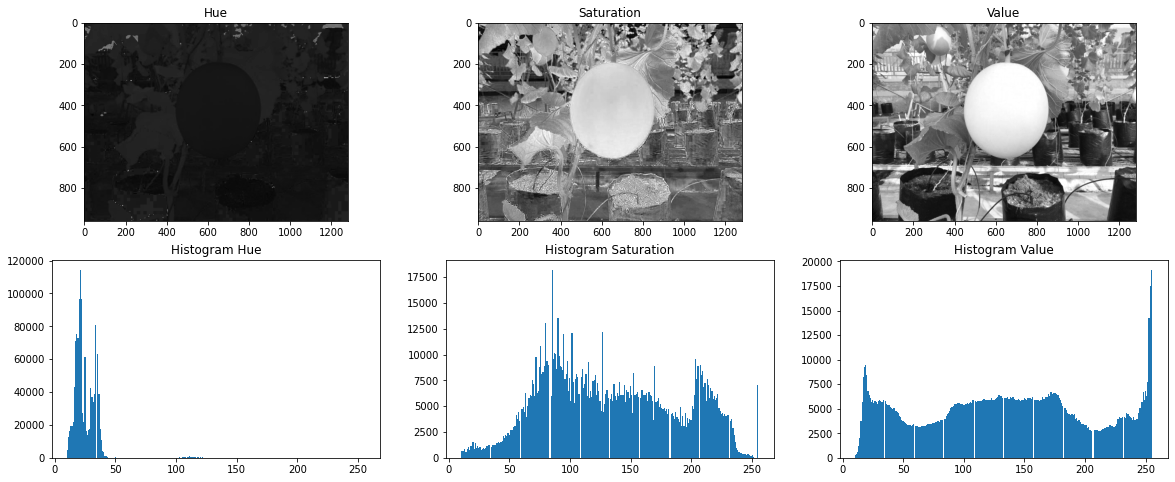

In [37]:

#Split HSV
h,s,v = cv2.split(kanvas_hsv)

# compara gambar
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Hue')
ax[0,0].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Hue')
ax[1,0].hist(h.ravel(), 256, [10,256])

ax[0,1].set_title('Saturation')
ax[0,1].imshow(s, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram Saturation')
ax[1,1].hist(s.ravel(), 256, [10,256])

ax[0,2].set_title('Value')
ax[0,2].imshow(v, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram Value')
ax[1,2].hist(v.ravel(), 256, [10, 256])

plt.show()

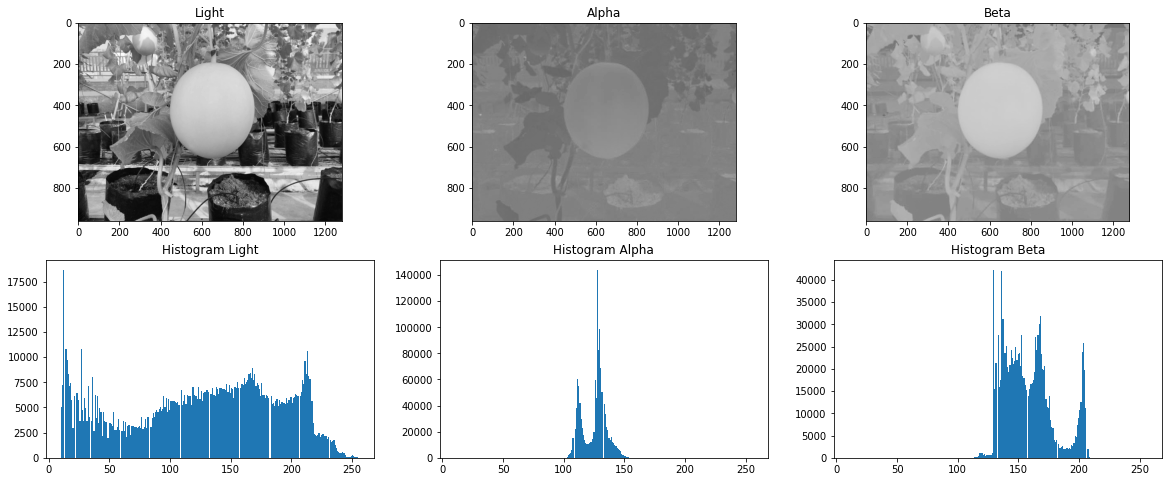

In [38]:
# Split untuk Lab
light,alpha,beta = cv2.split(gambarLab)

# Perbadingan citra
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Light')
ax[0,0].imshow(light, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Light')
ax[1,0].hist(light.ravel(), 256, [10,256])

ax[0,1].set_title('Alpha')
ax[0,1].imshow(alpha, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram Alpha')
ax[1,1].hist(alpha.ravel(), 256, [10,256])

ax[0,2].set_title('Beta')
ax[0,2].imshow(beta, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram Beta')
ax[1,2].hist(beta.ravel(), 256, [10, 256])

plt.show()

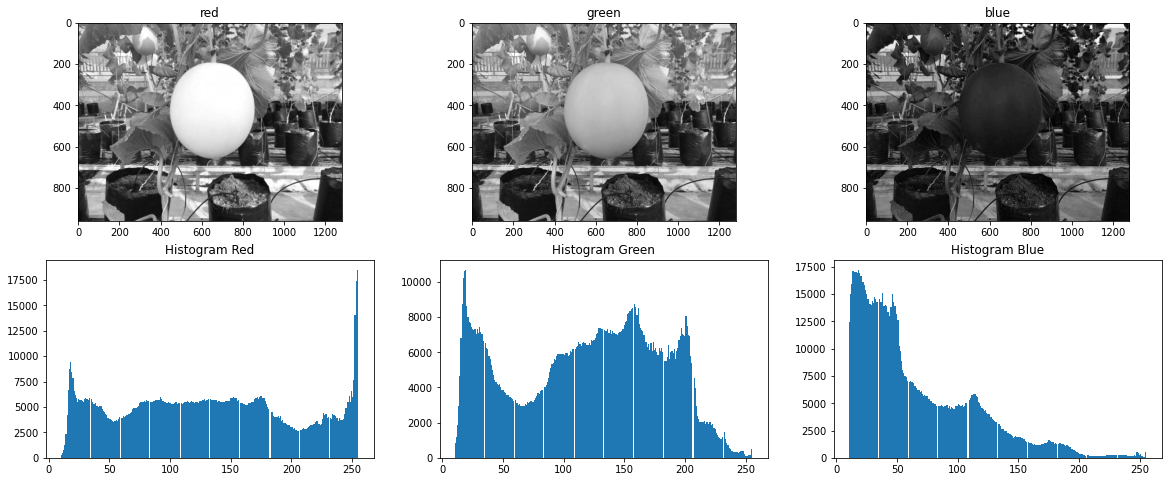

In [39]:
# Split RGB
red,green,blue = cv2.split(gambarRGB)

# Perbadingan citra
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('red')
ax[0,0].imshow(red, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Red')
ax[1,0].hist(red.ravel(), 256, [10,256])

ax[0,1].set_title('green')
ax[0,1].imshow(green, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram Green')
ax[1,1].hist(green.ravel(), 256, [10,256])

ax[0,2].set_title('blue')
ax[0,2].imshow(blue, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram Blue')
ax[1,2].hist(blue.ravel(), 256, [10, 256])

plt.show()

In [44]:
#Analisis salah satu hasil split dari Lab color space
# yang akan dianalisis dari Lab
# Penjumlahan Lab
sumL = 0
sumA = 0
sumB = 0

#loopin
for i in range (0, row):
  for j in range (0, col):
    sumL += light[i][j]
    sumA += alpha[i][j]
    sumB += beta[i][j]

# rata-rata Lab
meanL = sumL / (light.shape[0] * light.shape[1])
meanA = sumA / (alpha.shape[0] * alpha.shape[1])
meanB = sumB / (beta.shape[0] * beta.shape[1])

In [45]:
#Analisis salah satu hasil split dari Lab color space

# Penjumlahan HSV
sumH = 0
sumS = 0
sumV = 0

for i in range (0, row):
  for j in range (0, col):
    sumH += h[i][j]
    sumS += s[i][j]
    sumV += v[i][j]

# rata-rata HSV
meanH = sumH / (h.shape[0] * h.shape[1])
meanS = sumS / (s.shape[0] * s.shape[1])
meanV = sumV / (v.shape[0] * v.shape[1])

In [46]:
#Tresholding pada channel
tresholdingL = meanL
tresholdingA = meanA
tresholdingB = meanB

for i in range (0, row):
  for j in range (0, col):

    if light[i][j] >= tresholdingL:
       light[i][j] = 255
    else : 
      light[i][j] = 0

    if alpha[i][j] >= tresholdingA:
       alpha[i][j] = 255
    else : 
      alpha[i][j] = 0

    if beta[i][j] >= tresholdingB:
       beta[i][j] = 255
    else : 
      beta[i][j] = 0

print(tresholdingL)
print(tresholdingA)
print(tresholdingB)

137.75914306640624
164.7692626953125
115.99013671875


In [47]:
#Tresholding pada channel
tresholdingH = meanH
tresholdingS = meanS
tresholdingV = meanV


for i in range (0, row):
  for j in range (0, col):

    if h[i][j] >= tresholdingH:
       h[i][j] = 255
    else : h[i][j] = 0

    if s[i][j] >= tresholdingS:
       s[i][j] = 255
    else : s[i][j] = 0

    if v[i][j] >= tresholdingV:
       v[i][j] = 255
    else : v[i][j] = 0

print(tresholdingH)
print(tresholdingS)
print(tresholdingV)

24.91249755859375
133.10451822916667
134.7457527669271


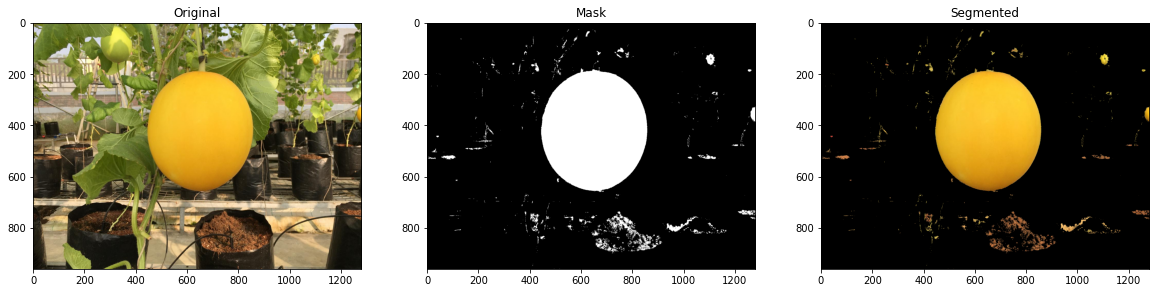

In [48]:
#Masking HSV
low = np.array([0, 136, 134])
upper = np.array([26, 255, 255])

mask = cv2.inRange(kanvas_hsv, low, upper)

result = cv2.bitwise_and(gambarRGB, gambarRGB, mask = mask)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Original')
ax[0,0].imshow(gambarRGB, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Mask')
ax[0,1].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[0,2].set_title('Segmented')
ax[0,2].imshow(result, cmap='gray', vmin=0, vmax=255)

plt.show()

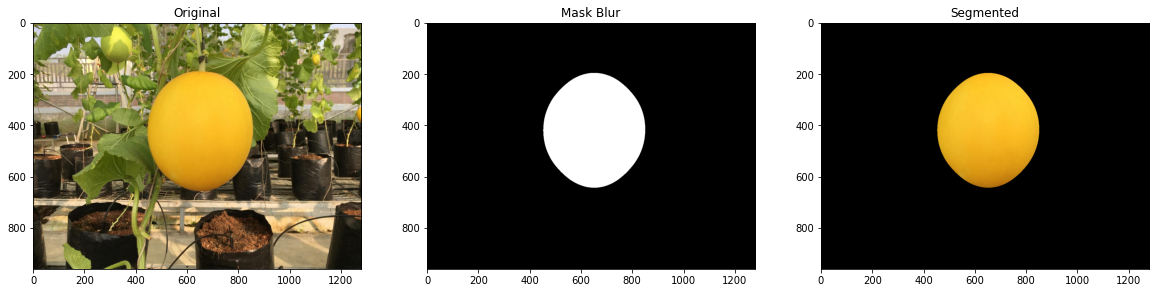

In [50]:
# Hilangkan noise pada mask
mask = cv2.medianBlur(mask, 155)
output = cv2.bitwise_and(gambarRGB, gambarRGB, mask = mask)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Original')
ax[0,0].imshow(gambarRGB, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Mask Blur')
ax[0,1].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[0,2].set_title('Segmented')
ax[0,2].imshow(output, cmap='gray', vmin=0, vmax=255)

plt.show()

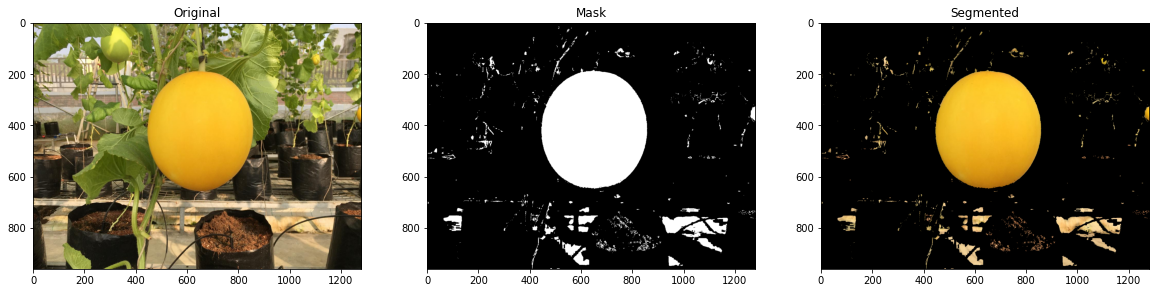

In [51]:
#Masking LAB
lower = np.array([125, 125, 158])
upper = np.array([255, 150, 255])

mask = cv2.inRange(gambarLab, lower, upper)

output = cv2.bitwise_and(gambarRGB, gambarRGB, mask = mask)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Original')
ax[0,0].imshow(gambarRGB, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Mask')
ax[0,1].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[0,2].set_title('Segmented')
ax[0,2].imshow(output, cmap='gray', vmin=0, vmax=255)

plt.show()

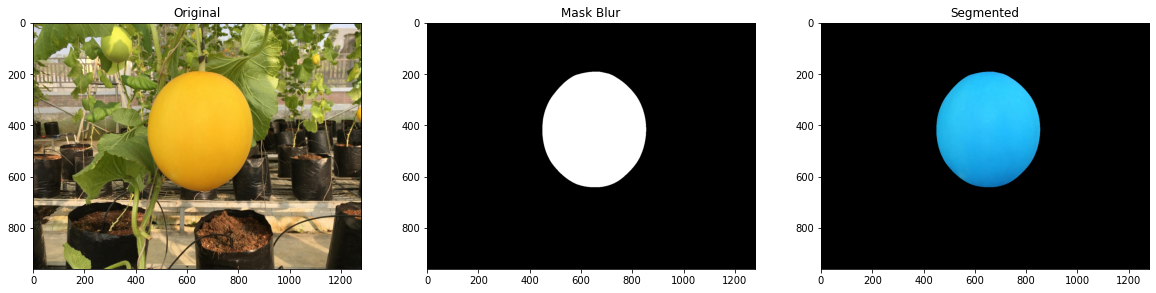

In [52]:
# Hilangkan noise pada mask
mask = cv2.medianBlur(mask, 155)
output = cv2.bitwise_and(gambar, gambar, mask = mask)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Original')
ax[0,0].imshow(gambarRGB, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Mask Blur')
ax[0,1].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[0,2].set_title('Segmented')
ax[0,2].imshow(output, cmap='gray', vmin=0, vmax=255)

plt.show()